<a href="https://colab.research.google.com/github/ArminD93/WorldHappinessReport/blob/dev/WorldHappinessReport_podsumowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Raport szczęścia w różnych krajach na Świecie w latach 2015 - 2019**
### Podsumowanie analizy danych

---


# **Spis treści:**
## 1. [Import bibliotek i przygotowanie niezbędnych dodatków](#0)
## 2. [Prezentacja danych](#1)
## 3. [Funkcje obsługujące data frame](#2)
## 4. [Przeglądanie danych:](#3)
  *   [Mapy korelacji dla poszczególnych raportów](#4)
  *   [Kraje o najwższym poziomie szczęścia](#5)

## 5. [Przygotowanie raportów dla jednej cechy z wszystkich lat:](#6)
  *   [Ustawienie wszystkich lat w jednej kolumnie](#7)
  *   [Prezentacja na wykresie punktowym zmian poziomu szczęścia w latach 2015 - 2019](#8)  
  *   [Prezentacja zmian poziomu cech, mających największy wpływ na poziom szczęścia w latach 2015 - 2019](#9)

## 5. [Przygotowanie danych do uczenia maszynowego:](#10)
  *   [Wizualizacja cech, mających największy wpływ na poziom szczęścia w latach 2015 - 2019](#11)
  *  [Usunięcie wartości odstających](#12)
  *  [Podział danych na zbiory uczące i testowe](#13)
  *  [Skalowanie wartości](#14)
  *  [Testowanie modelu regresji liniowej](#15)









## <a name='0'></a> Import bibliotek i przygotowanie niezbędnych dodatków


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/WorldHappiness/'
%run WorldHappinessReport_configuration.ipynb


happiness2015_raw = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2015.csv', low_memory=False)
happiness2016_raw = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2016.csv', low_memory=False)
happiness2017_raw = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2017.csv', low_memory=False)
happiness2018_raw = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2018.csv', low_memory=False)
happiness2019_raw = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2019.csv', low_memory=False)


# Utworzenie kopii danych:
happiness2015 = happiness2015_raw.copy()
happiness2016 = happiness2016_raw.copy()
happiness2017 = happiness2017_raw.copy()
happiness2018 = happiness2018_raw.copy()
happiness2019 = happiness2019_raw.copy()



# Utworzenie obiektów wybranych klas
DistributionObj2015 = Distribution(happiness2015)
CorrelationObj2015  = Correlation(dataset=happiness2015)

DistributionObj2016 = Distribution(happiness2016)
CorrelationObj2016  = Correlation(dataset=happiness2016)

DistributionObj2017 = Distribution(happiness2017)
CorrelationObj2017  = Correlation(dataset=happiness2017)

DistributionObj2018 = Distribution(happiness2018)
CorrelationObj2018  = Correlation(dataset=happiness2018)

DistributionObj2019 = Distribution(happiness2019)
CorrelationObj2019  = Correlation(dataset=happiness2019)

/content/drive/My Drive/ColabNotebooks/WorldHappiness


## <a name='1'></a>Prezentacja danych

In [2]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
happiness2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
happiness2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [6]:
happiness2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## <a name='2'></a> Funkcje obsługujące data frame

In [0]:
def rename_columns(report, newColNames_dict):
    '''
    rename_columns - Rename name of data frame columns
    report - set data frame
    newColNames - set dictionary which consist old and new names of columns
    '''
    report.rename(columns=newColNames_dict, inplace=True)
    return report


def create_report_for_one_feature(report, col1, col2):
    '''
    create_report_for_one_feature - Create report which consist only two columns
    report - set data frame
    col1 - name of first column from chosen data frame
    col2 - name of second column from chosen data frame

    '''
    one_feature_report = report[[col1, col2]]
    return one_feature_report


def create_ALLYears_report(report1, report2, report3, report4, report5, merge_on):
    '''
    create_ALLYears_report - merging few data frames together
    report1, report2, report3, report4, report5  - names of data frames
    merge_on - set a common column for all data frames
    '''
    report_AllYears = pd.merge(report1, report2,  on= merge_on, suffixes=['_2015', '_2016'])
    report_AllYears = report_AllYears.merge(report3, on= merge_on                             )
    report_AllYears = report_AllYears.merge(report4, on= merge_on, suffixes=['_2017','_2018'] )
    report_AllYears = report_AllYears.merge(report5, on= merge_on                             )

    report_AllYears.set_index('Country or region', inplace=True)  
    return report_AllYears  
       

In [0]:
reports_dict = {'happiness2015' : happiness2015,
                'happiness2016' : happiness2016,
                'happiness2017' : happiness2017,
                'happiness2018' : happiness2018,
                'happiness2019' : happiness2019
               }

report2015  = [ val for val in reports_dict.values() ][0]
report2016  = [ val for val in reports_dict.values() ][1]
report2017  = [ val for val in reports_dict.values() ][2]
report2018  = [ val for val in reports_dict.values() ][3]
report2019  = [ val for val in reports_dict.values() ][4]

In [0]:
newNames = { 
                'Country'                  : 'Country or region',
                'Economy (GDP per Capita)' : 'Economy',
                'Economy..GDP.per.Capita.' : 'Economy',
                'GDP per capita'           : 'Economy',
                'Health (Life Expectancy)' : 'Healthy_life_expectancy',
                'Health..Life.Expectancy.' : 'Healthy_life_expectancy',
                'Healthy life expectancy'  : 'Healthy_life_expectancy',
                'Family'                   : 'Social_support',
                'Social support'           : 'Social_support',
                'Happiness Score'          : 'HappinessScore',
                'Happiness.Score'          : 'HappinessScore',
                'Score'                    : 'HappinessScore'
                }

report2015 = rename_columns(report2015, newNames)
report2016 = rename_columns(report2016, newNames)
report2017 = rename_columns(report2017, newNames)
report2018 = rename_columns(report2018, newNames)
report2019 = rename_columns(report2019, newNames)

## <a name='3'></a> Przeglądanie danych

### <a name='4'></a> Mapy korelacji dla poszczególnych raportów

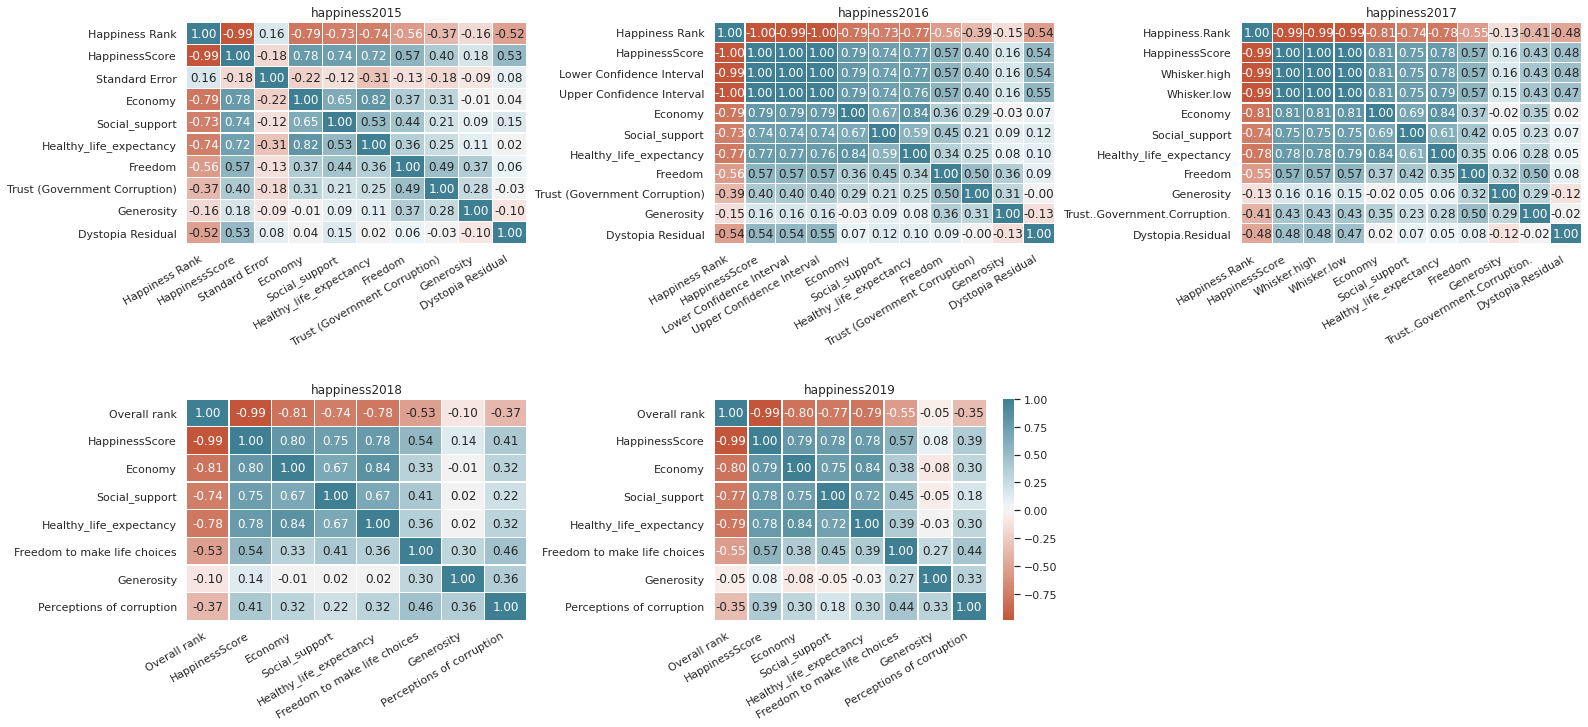

In [10]:
reportNo = 0
cols = 3
rows = 2
set_cbar = False

fig = plt.figure(figsize=(25,11))
fig.subplots_adjust(hspace=0.7, wspace=0.55)

for i in range(1, 6):
      fig.add_subplot(rows, cols, i) 
      report      = [ val for val in reports_dict.values() ][reportNo]
      report_name = [ key for key in reports_dict.keys()   ][reportNo]

      corr= report.corr()

      if i == 5:
        set_cbar=True

      g = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cbar=set_cbar, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(20, 220, n=256))
      g.set_xticklabels( g.get_xticklabels(), rotation=30,  horizontalalignment='right', fontweight='light' )
      g.set( title= report_name)
      reportNo += 1


plt.show()

### <a name='5'></a> Kraje o najwższym poziomie szczęścia

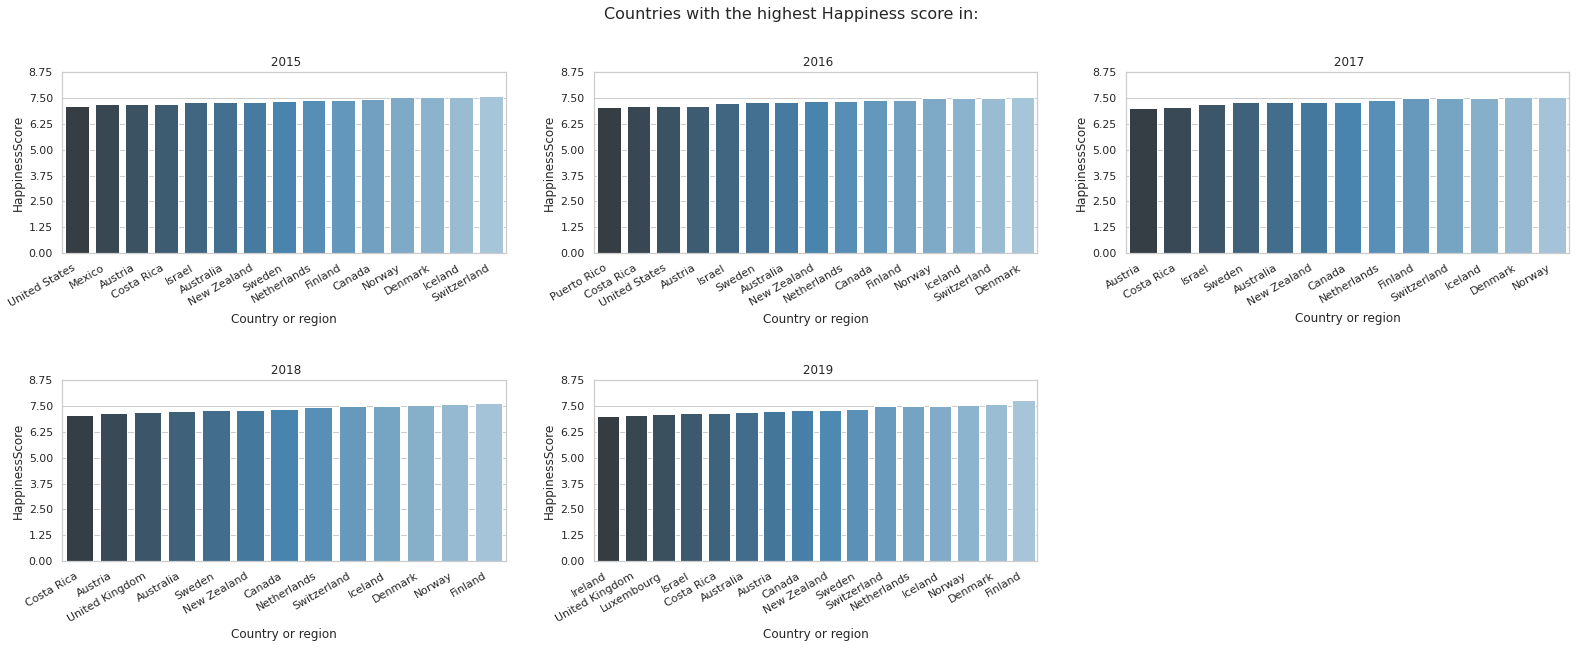

In [11]:
x_data = ['Country', 'Country', 'Country', 'Country or region', 'Country or region' ]

reportNo = 0
cols = 3
rows = 2
x_data_id = 0


fig = plt.figure(figsize=(27,9))
fig.subplots_adjust(hspace=0.7, wspace=0.2)

for i in range(1, 6):
      fig.add_subplot(rows, cols, i) 
      report      = [ val for val in reports_dict.values() ][reportNo]
      report_name = [ key for key in reports_dict.keys()   ][reportNo].split('happiness')[1]

      happinessGreaterthan7 = report['HappinessScore'] >= 7
      Sortedhappiness = report[happinessGreaterthan7].sort_values(by='HappinessScore')


      g = sns.barplot(  data=Sortedhappiness, x='Country or region',  y='HappinessScore', palette='Blues_d'  )

      g.set( xlabel='Country or region', ylabel='HappinessScore', title=' {}'.format(report_name))
      g.set_xticklabels( g.get_xticklabels(), rotation=30,  horizontalalignment='right', fontweight='light' )
      g.set_yticks(np.arange(0, 9, step=1.25))


      fig.suptitle('Countries with the highest Happiness score in:', fontsize=16)

      reportNo  += 1
      x_data_id += 1


plt.show()

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode

fig = make_subplots(
                    rows=2, cols=3,
                    specs=[[{},   {},       {}],
                          [ {},   {},   None ]], 
                    subplot_titles=('2015', '2016', '2017', '2018', '2019'),
                    print_grid=False)

reportNo = 0
x_data_id = 0

for row in range(1, 3): 
  for col in range(1, 4):
    if (row == 2) and (col == 3):
      row, col = 0, 0
      break  

    report = [ val for val in reports_dict.values() ][reportNo]

    happinessGreaterthan7 = report['HappinessScore'] >= 7
    Sortedhappiness = report[happinessGreaterthan7].sort_values(by='HappinessScore')

    fig.add_trace(go.Bar(x=Sortedhappiness['Country or region'],  y=Sortedhappiness['HappinessScore']), row=row, col=col)

    reportNo  += 1
    x_data_id += 1

fig.update_yaxes(range=[0, 9], dtick=1.25)
fig.update_xaxes(tickangle=-35)
fig.update_layout(showlegend=False, title_text="Countries with the highest Happiness score in:", title_font_size = 25)

#fig.show('svg')
fig.show()

## <a name='6'></a> Przygotowanie raportów dla jednej cechy z wszystkich lat

In [13]:
happy_report2015 = create_report_for_one_feature(report2015, 'Country or region', 'HappinessScore')
happy_report2016 = create_report_for_one_feature(report2016, 'Country or region', 'HappinessScore')
happy_report2017 = create_report_for_one_feature(report2017, 'Country or region', 'HappinessScore')
happy_report2018 = create_report_for_one_feature(report2018, 'Country or region', 'HappinessScore')
happy_report2019 = create_report_for_one_feature(report2019, 'Country or region', 'HappinessScore')

happy_AllYears = create_ALLYears_report(happy_report2015, happy_report2016, happy_report2017, happy_report2018, happy_report2019, merge_on='Country or region')

happy_AllYears.head()

,HappinessScore_2015,HappinessScore_2016,HappinessScore_2017,HappinessScore_2018,HappinessScore
Country or region,,,,,
Switzerland,7.587,7.509,7.494,7.487,7.480
Iceland,7.561,7.501,7.504,7.495,7.494
Denmark,7.527,7.526,7.522,7.555,7.600
Norway,7.522,7.498,7.537,7.594,7.554
Canada,7.427,7.404,7.316,7.328,7.278


In [14]:
economy_report2015 = create_report_for_one_feature(report2015, 'Country or region', 'Economy')
economy_report2016 = create_report_for_one_feature(report2016, 'Country or region', 'Economy')
economy_report2017 = create_report_for_one_feature(report2017, 'Country or region', 'Economy')
economy_report2018 = create_report_for_one_feature(report2018, 'Country or region', 'Economy')
economy_report2019 = create_report_for_one_feature(report2019, 'Country or region', 'Economy')

economy_AllYears = create_ALLYears_report(economy_report2015, economy_report2016, economy_report2017, economy_report2018, economy_report2019, merge_on='Country or region')

economy_AllYears.head()

,Economy_2015,Economy_2016,Economy_2017,Economy_2018,Economy
Country or region,,,,,
Switzerland,1.39651,1.52733,1.564980,1.420,1.452
Iceland,1.30232,1.42666,1.480633,1.343,1.380
Denmark,1.32548,1.44178,1.482383,1.351,1.383
Norway,1.45900,1.57744,1.616463,1.456,1.488
Canada,1.32629,1.44015,1.479204,1.330,1.365


In [15]:
healthy_report2015 = create_report_for_one_feature(report2015, 'Country or region', 'Healthy_life_expectancy')
healthy_report2016 = create_report_for_one_feature(report2016, 'Country or region', 'Healthy_life_expectancy')
healthy_report2017 = create_report_for_one_feature(report2017, 'Country or region', 'Healthy_life_expectancy')
healthy_report2018 = create_report_for_one_feature(report2018, 'Country or region', 'Healthy_life_expectancy')
healthy_report2019 = create_report_for_one_feature(report2019, 'Country or region', 'Healthy_life_expectancy')

healthy_AllYears = create_ALLYears_report(healthy_report2015, healthy_report2016, healthy_report2017, healthy_report2018, healthy_report2019, merge_on='Country or region')

healthy_AllYears.head()

,Healthy_life_expectancy_2015,Healthy_life_expectancy_2016,Healthy_life_expectancy_2017,Healthy_life_expectancy_2018,Healthy_life_expectancy
Country or region,,,,,
Switzerland,0.94143,0.86303,0.858131,0.927,1.052
Iceland,0.94784,0.86733,0.833552,0.914,1.026
Denmark,0.87464,0.79504,0.792566,0.868,0.996
Norway,0.88521,0.79579,0.796667,0.861,1.028
Canada,0.90563,0.82760,0.834558,0.896,1.039


In [16]:
social_support_report2015 = create_report_for_one_feature(report2015, 'Country or region', 'Social_support')
social_support_report2016 = create_report_for_one_feature(report2016, 'Country or region', 'Social_support')
social_support_report2017 = create_report_for_one_feature(report2017, 'Country or region', 'Social_support')
social_support_report2018 = create_report_for_one_feature(report2018, 'Country or region', 'Social_support')
social_support_report2019 = create_report_for_one_feature(report2019, 'Country or region', 'Social_support')

social_support_AllYears = create_ALLYears_report(social_support_report2015, social_support_report2016, social_support_report2017, social_support_report2018, social_support_report2019, merge_on='Country or region')
social_support_AllYears.head()

,Social_support_2015,Social_support_2016,Social_support_2017,Social_support_2018,Social_support
Country or region,,,,,
Switzerland,1.34951,1.14524,1.516912,1.549,1.526
Iceland,1.40223,1.18326,1.610574,1.644,1.624
Denmark,1.36058,1.16374,1.551122,1.590,1.573
Norway,1.33095,1.12690,1.533524,1.582,1.582
Canada,1.32261,1.09610,1.481349,1.532,1.505


In [17]:
Years_list = ['2015', '2016', '2017', '2018', '2019']

happy_newCol_dict          = dict( zip( happy_AllYears.columns,            Years_list          ) )
economy_newCol_dict        = dict( zip( economy_AllYears.columns,          Years_list          ) )
healthy_newCol_dict        = dict( zip( healthy_AllYears.columns,          Years_list          ) )
social_support_newCol_dict = dict( zip( social_support_AllYears.columns,   Years_list          ) )

happy_AllYears             = rename_columns( happy_AllYears,          happy_newCol_dict          )
economy_AllYears           = rename_columns( economy_AllYears,        economy_newCol_dict        )

healthy_AllYears           = rename_columns( healthy_AllYears,        healthy_newCol_dict        )
social_support_AllYears    = rename_columns( social_support_AllYears, social_support_newCol_dict )


happy_AllYears.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,7.587,7.509,7.494,7.487,7.480
Iceland,7.561,7.501,7.504,7.495,7.494
Denmark,7.527,7.526,7.522,7.555,7.600
Norway,7.522,7.498,7.537,7.594,7.554
Canada,7.427,7.404,7.316,7.328,7.278


In [18]:
economy_AllYears.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,1.39651,1.52733,1.564980,1.420,1.452
Iceland,1.30232,1.42666,1.480633,1.343,1.380
Denmark,1.32548,1.44178,1.482383,1.351,1.383
Norway,1.45900,1.57744,1.616463,1.456,1.488
Canada,1.32629,1.44015,1.479204,1.330,1.365


In [19]:
healthy_AllYears.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,0.94143,0.86303,0.858131,0.927,1.052
Iceland,0.94784,0.86733,0.833552,0.914,1.026
Denmark,0.87464,0.79504,0.792566,0.868,0.996
Norway,0.88521,0.79579,0.796667,0.861,1.028
Canada,0.90563,0.82760,0.834558,0.896,1.039


In [20]:
social_support_AllYears.head()

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,1.34951,1.14524,1.516912,1.549,1.526
Iceland,1.40223,1.18326,1.610574,1.644,1.624
Denmark,1.36058,1.16374,1.551122,1.590,1.573
Norway,1.33095,1.12690,1.533524,1.582,1.582
Canada,1.32261,1.09610,1.481349,1.532,1.505


### <a name='7'></a> Ustawienie wszystkich lat w jednej kolumnie

In [21]:
happy_AllYears_stacked = happy_AllYears.stack().to_frame()
economy_AllYears_stacked = economy_AllYears.stack().to_frame()
healthy_AllYears_stacked = healthy_AllYears.stack().to_frame()
social_support_AllYears_stacked = social_support_AllYears.stack().to_frame()

happy_AllYears_stacked.reset_index(inplace=True)
economy_AllYears_stacked.reset_index(inplace=True)
healthy_AllYears_stacked.reset_index(inplace=True)
social_support_AllYears_stacked.reset_index(inplace=True)

happy_AllYears_stacked.head()

,Country or region,level_1,0
0,Switzerland,2015,7.587
1,Switzerland,2016,7.509
2,Switzerland,2017,7.494
3,Switzerland,2018,7.487
4,Switzerland,2019,7.480


In [22]:
newHappyColNames = { 'level_1'  :   'Year',
                        0  :   'HappinessScore'}
happy_AllYears_stacked.rename(columns=newHappyColNames, inplace=True)

happy_AllYears_stacked.head()

,Country or region,Year,HappinessScore
0,Switzerland,2015,7.587
1,Switzerland,2016,7.509
2,Switzerland,2017,7.494
3,Switzerland,2018,7.487
4,Switzerland,2019,7.480


In [23]:
newEconomyColNames = { 'level_1'  :   'Year',
                        0  :   'Economy'}
economy_AllYears_stacked.rename(columns=newEconomyColNames, inplace=True)

economy_AllYears_stacked.head()

,Country or region,Year,Economy
0,Switzerland,2015,1.39651
1,Switzerland,2016,1.52733
2,Switzerland,2017,1.56498
3,Switzerland,2018,1.42000
4,Switzerland,2019,1.45200


In [24]:
newHealthyColNames = { 'level_1'  :   'Year',
                        0  :   'Health (LifeExpectancy)'}
healthy_AllYears_stacked.rename(columns=newHealthyColNames, inplace=True)

healthy_AllYears_stacked.head()

,Country or region,Year,Health (LifeExpectancy)
0,Switzerland,2015,0.941430
1,Switzerland,2016,0.863030
2,Switzerland,2017,0.858131
3,Switzerland,2018,0.927000
4,Switzerland,2019,1.052000


In [25]:
newSocialColNames = { 'level_1'  :   'Year',
                        0  :   'socialSupport'}
social_support_AllYears_stacked.rename(columns=newSocialColNames, inplace=True)

social_support_AllYears_stacked.head()

,Country or region,Year,socialSupport
0,Switzerland,2015,1.349510
1,Switzerland,2016,1.145240
2,Switzerland,2017,1.516912
3,Switzerland,2018,1.549000
4,Switzerland,2019,1.526000


### <a name='8'></a> Prezentacja na wykresie punktowym zmian poziomu szczęścia w latach 2015 - 2019

In [26]:
happinessAllYearsGreaterThan7 = happy_AllYears_stacked['HappinessScore'] >= 7
happinessAllYears_sorted = happy_AllYears_stacked[happinessAllYearsGreaterThan7].sort_values(by=['HappinessScore'])
happinessAllYears_sorted.head()

,Country or region,Year,HappinessScore
62,Austria,2017,7.006
89,Ireland,2019,7.021
104,United Kingdom,2019,7.054
58,Costa Rica,2018,7.072
57,Costa Rica,2017,7.079


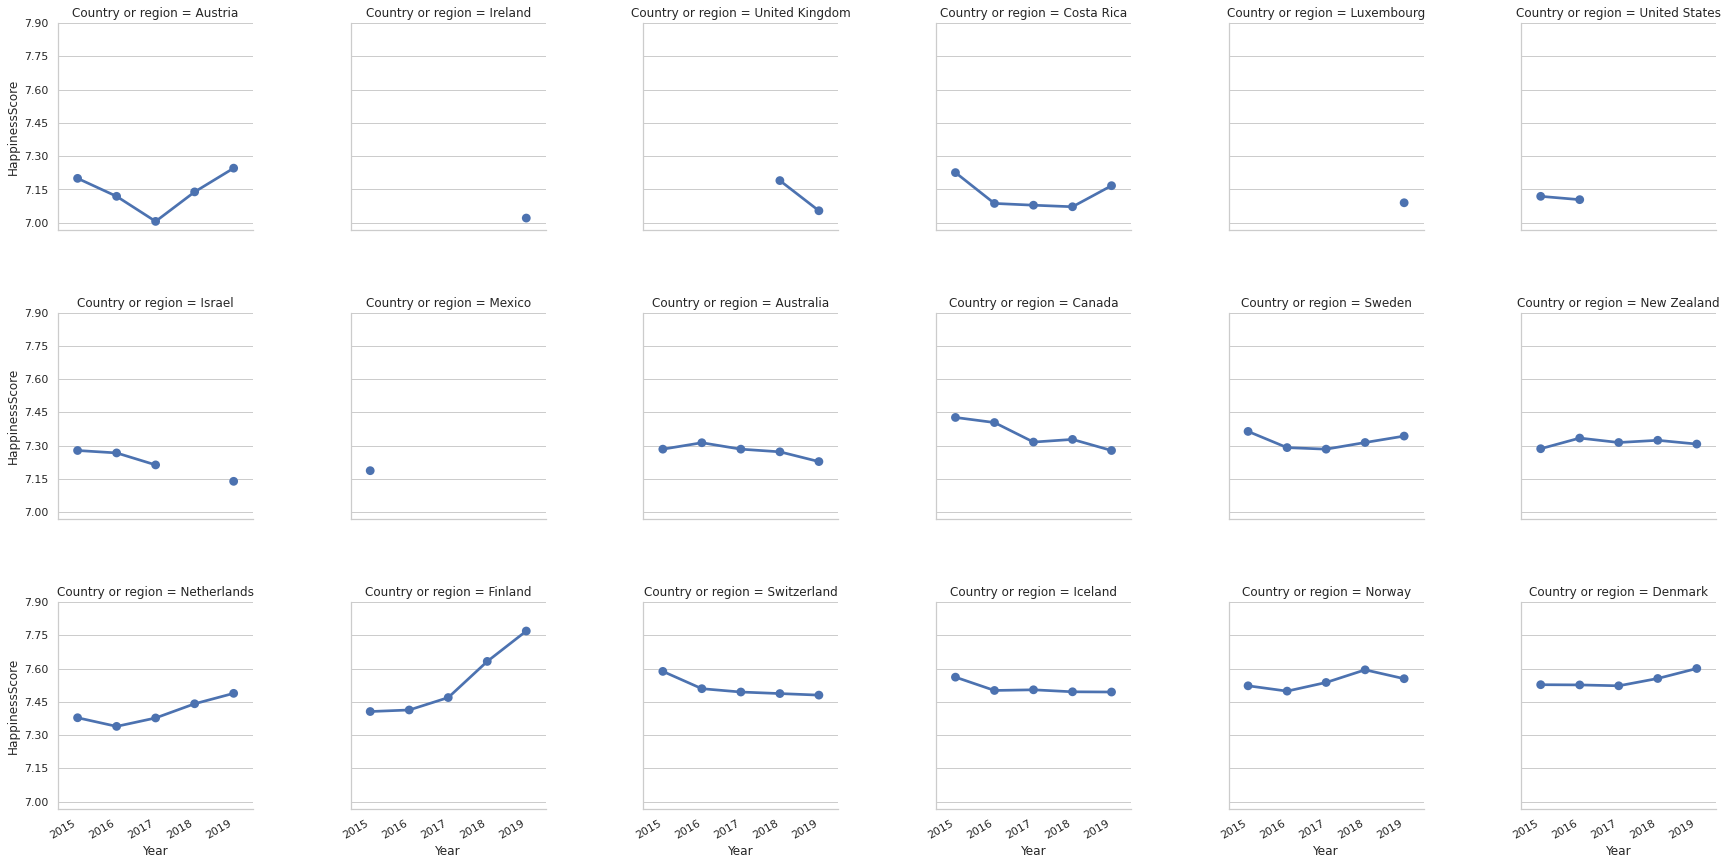

In [27]:
g = sns.catplot(x="Year", y="HappinessScore", col="Country or region", col_wrap=6, kind="point", data=happinessAllYears_sorted, height=4,  aspect=1 )
g.set_xticklabels( rotation=30,  horizontalalignment='right', fontweight='light' )
g.set(yticks=np.arange(7, 8, step=0.15))
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.show()

### <a name='9'></a> Prezentacja zmian poziomu cech, mających największy wpływ na poziom szczęścia w latach 2015 - 2019

In [28]:
happy_AllYears

,2015,2016,2017,2018,2019
Country or region,,,,,
Switzerland,7.587,7.509,7.494,7.487,7.480
Iceland,7.561,7.501,7.504,7.495,7.494
Denmark,7.527,7.526,7.522,7.555,7.600
Norway,7.522,7.498,7.537,7.594,7.554
Canada,7.427,7.404,7.316,7.328,7.278
...,...,...,...,...,...
Rwanda,3.465,3.515,3.471,3.408,3.334
Benin,3.340,3.484,3.657,4.141,4.883
Syria,3.006,3.069,3.462,3.462,3.462


In [29]:
happy_filter_GreaterThan7   =  happy_AllYears          [ ['2015', '2016', '2017', '2018', '2019' ] ] >= 7
economy_filter_GreaterThan7 =  economy_AllYears        [ [ '2015', '2016', '2017', '2018', '2019'] ] >= 1.33
healthy_filter_GreaterThan7 =  healthy_AllYears        [ [ '2015', '2016', '2017', '2018', '2019'] ] >= 0.83
social_filter_GreaterThan7  =  social_support_AllYears [ [ '2015', '2016', '2017', '2018', '2019'] ] >= 1.10

happy_AllYears_sorted       =  happy_AllYears          [ happy_filter_GreaterThan7                 ]
economy_AllYears_sorted     =  economy_AllYears        [ economy_filter_GreaterThan7               ]
healthy_AllYears_sorted     =  healthy_AllYears        [ healthy_filter_GreaterThan7               ]
social_support_sorted       =  social_support_AllYears [ social_filter_GreaterThan7                ]                       


happy_AllYears_sorted.dropna(inplace=True)
economy_AllYears_sorted.dropna(inplace=True)
healthy_AllYears_sorted.dropna(inplace=True)
social_support_sorted.dropna(inplace=True)

happy_AllYears_sorted.shape

(12, 5)

In [30]:
economy_AllYears_sorted.shape

(13, 5)

In [31]:
healthy_AllYears_sorted.shape

(13, 5)

In [32]:
social_support_sorted.shape

(11, 5)

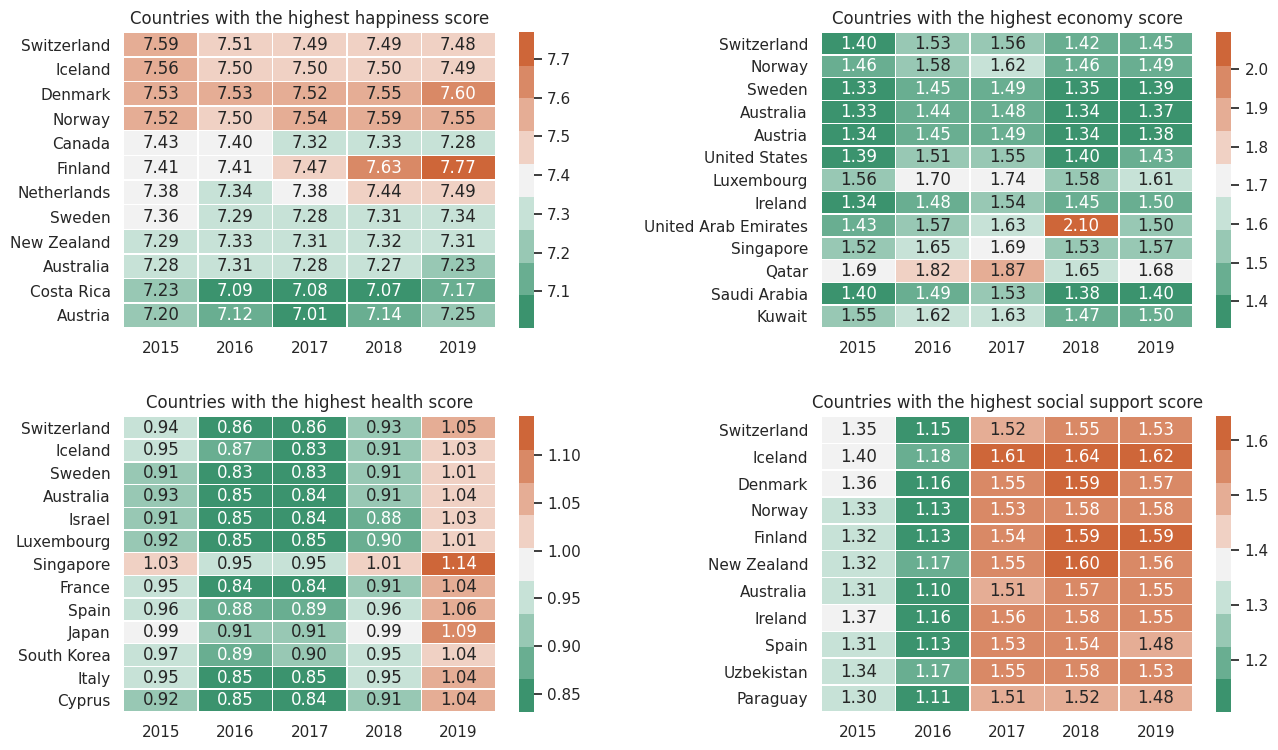

In [33]:
SortedReports_dict = {
                      'happiness'      : happy_AllYears_sorted,
                      'economy'        : economy_AllYears_sorted,
                      'health'         : healthy_AllYears_sorted,
                      'social support' : social_support_sorted
                      }

SortedReports_id = 0
cols = 2
rows = 2

fig = plt.figure(figsize=(15,9), dpi=100)
fig.subplots_adjust(hspace=0.3, wspace=0.5)

for i, SortedReport in enumerate(SortedReports_dict.values(), 1):

      report_name = [ key for key in SortedReports_dict.keys()   ][SortedReports_id]
      
      fig.add_subplot(rows, cols, i) 
      g = sns.heatmap(SortedReport, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(150, 385, s=80, l=55, n=9))
      g.set( title= 'Countries with the highest {} score'.format(report_name))
      g.set_ylabel('')  

      SortedReports_id += 1

plt.show()

## <a name='10'></a> Przygtowanie danych do uczenia maszynowego

### <a name='11'></a>Wizualizacja cech, mających największy wpływ na poziom szczęścia w latach 2015 - 2019

In [34]:
happy_AllYears_stacked.head()

,Country or region,Year,HappinessScore
0,Switzerland,2015,7.587
1,Switzerland,2016,7.509
2,Switzerland,2017,7.494
3,Switzerland,2018,7.487
4,Switzerland,2019,7.480


In [35]:
economy_AllYears_stacked.shape

(705, 3)

In [36]:
healthy_AllYears_stacked.shape

(705, 3)

In [37]:
social_support_AllYears_stacked.shape

(705, 3)

In [38]:
AllFeatures = pd.merge(happy_AllYears_stacked, economy_AllYears_stacked, on= ['Country or region', 'Year'] )
AllFeatures = AllFeatures.merge(healthy_AllYears_stacked,                on= ['Country or region', 'Year'] )
AllFeatures = AllFeatures.merge(social_support_AllYears_stacked,         on= ['Country or region', 'Year'] )

                                          
AllFeatures.head()                                                                         

,Country or region,Year,HappinessScore,Economy,Health (LifeExpectancy),socialSupport
0,Switzerland,2015,7.587,1.39651,0.941430,1.349510
1,Switzerland,2016,7.509,1.52733,0.863030,1.145240
2,Switzerland,2017,7.494,1.56498,0.858131,1.516912
3,Switzerland,2018,7.487,1.42000,0.927000,1.549000
4,Switzerland,2019,7.480,1.45200,1.052000,1.526000


In [39]:
AllFeatures.groupby(by='Year')['HappinessScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,141.0,5.406716,1.169844,2.839,4.518,5.286,6.302,7.587
2016,141.0,5.397887,1.159746,2.905,4.404,5.314,6.355,7.526
2017,141.0,5.408291,1.122669,2.905,4.535,5.311,6.344,7.537
2018,141.0,5.440156,1.110110,2.905,4.559,5.472,6.260,7.632
2019,141.0,5.485383,1.096099,3.203,4.628,5.467,6.199,7.769


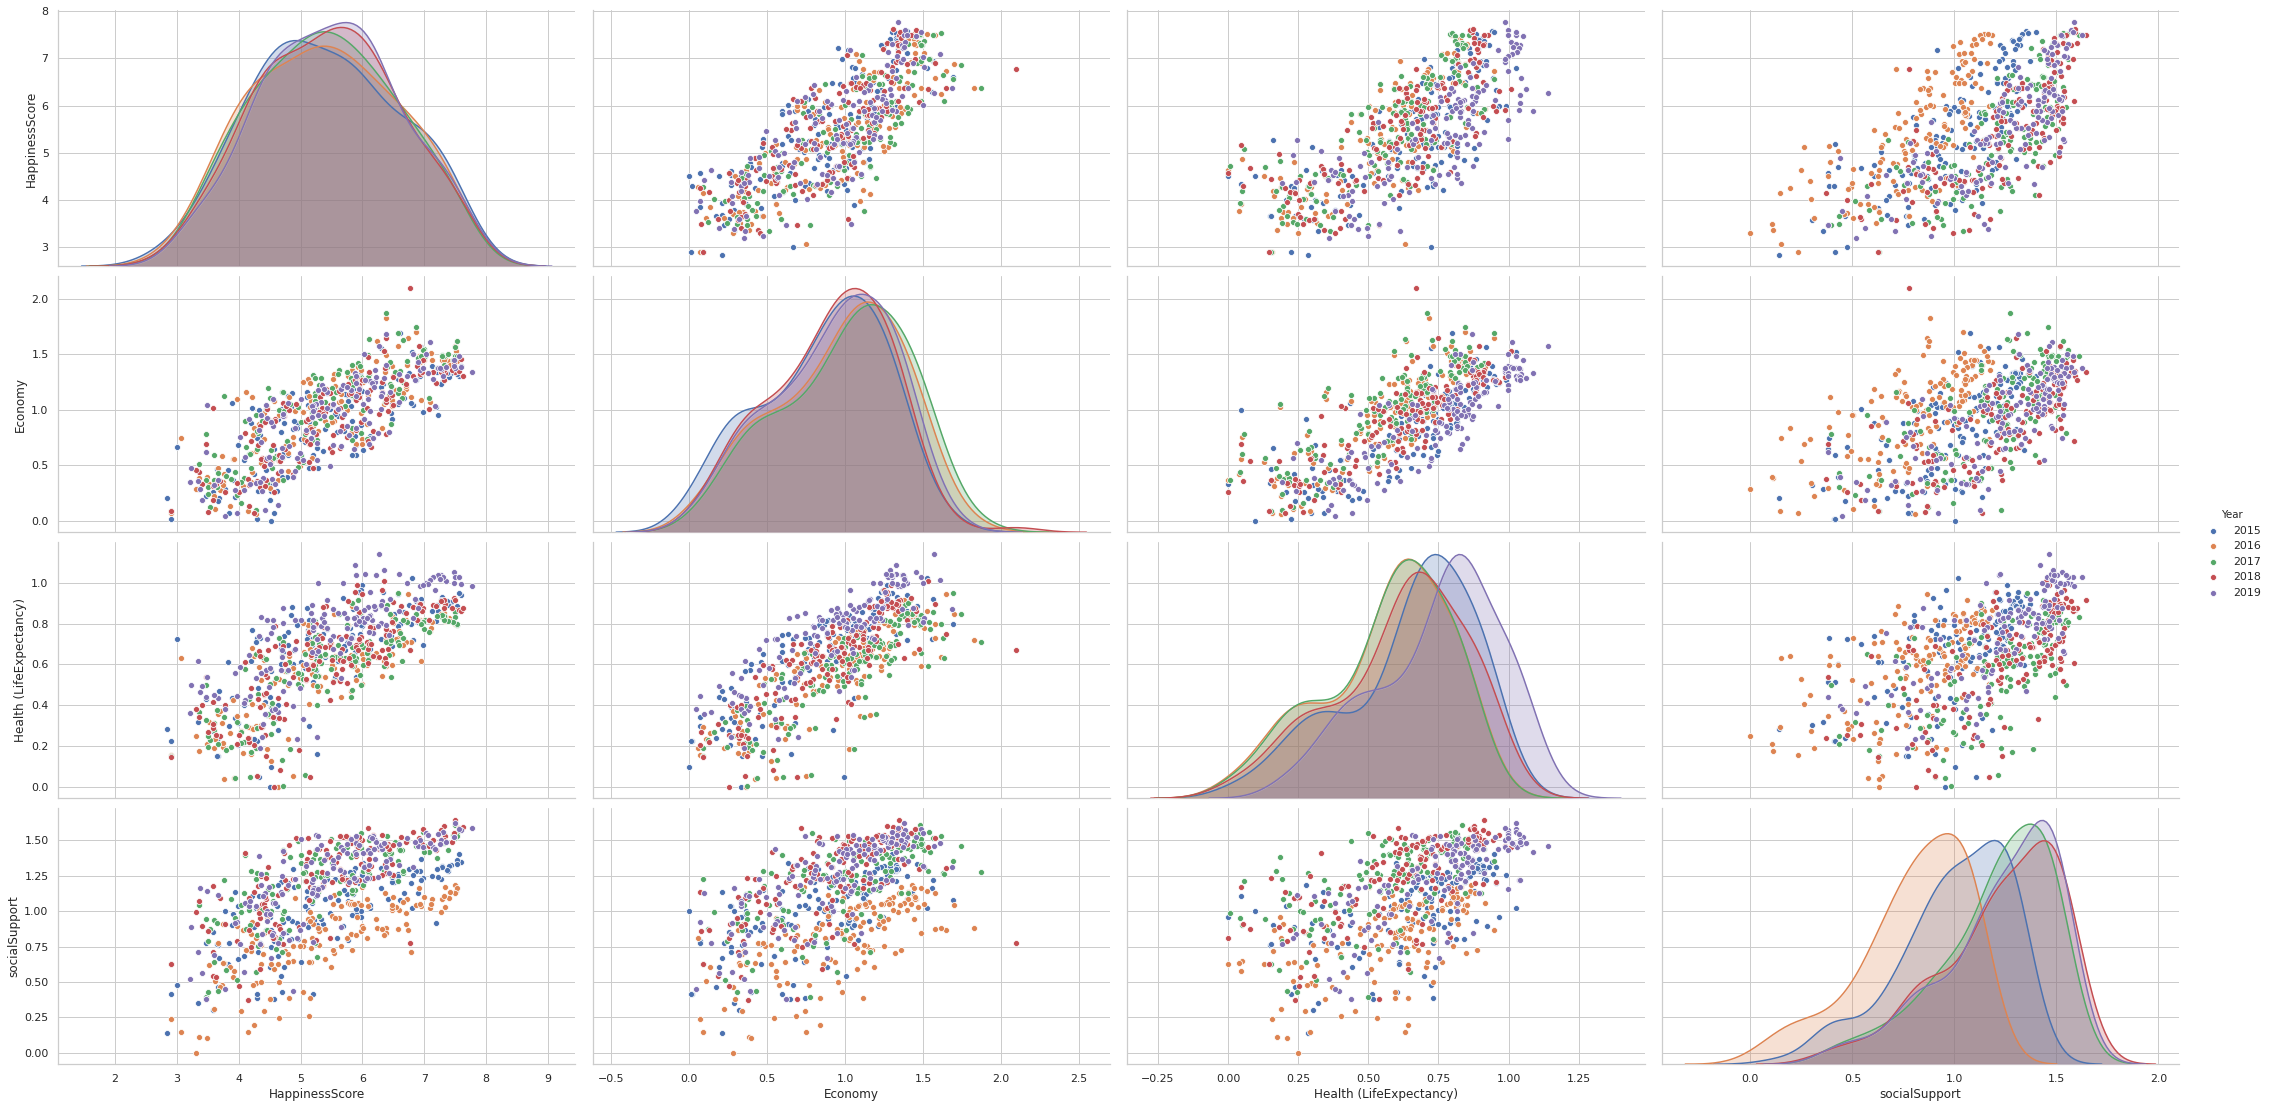

In [40]:
features = ['HappinessScore', 'Economy', 	'Health (LifeExpectancy)', 'socialSupport']


g = sns.pairplot(AllFeatures, hue="Year", diag_kind="kde", height=3.8, aspect=2)
plt.show()

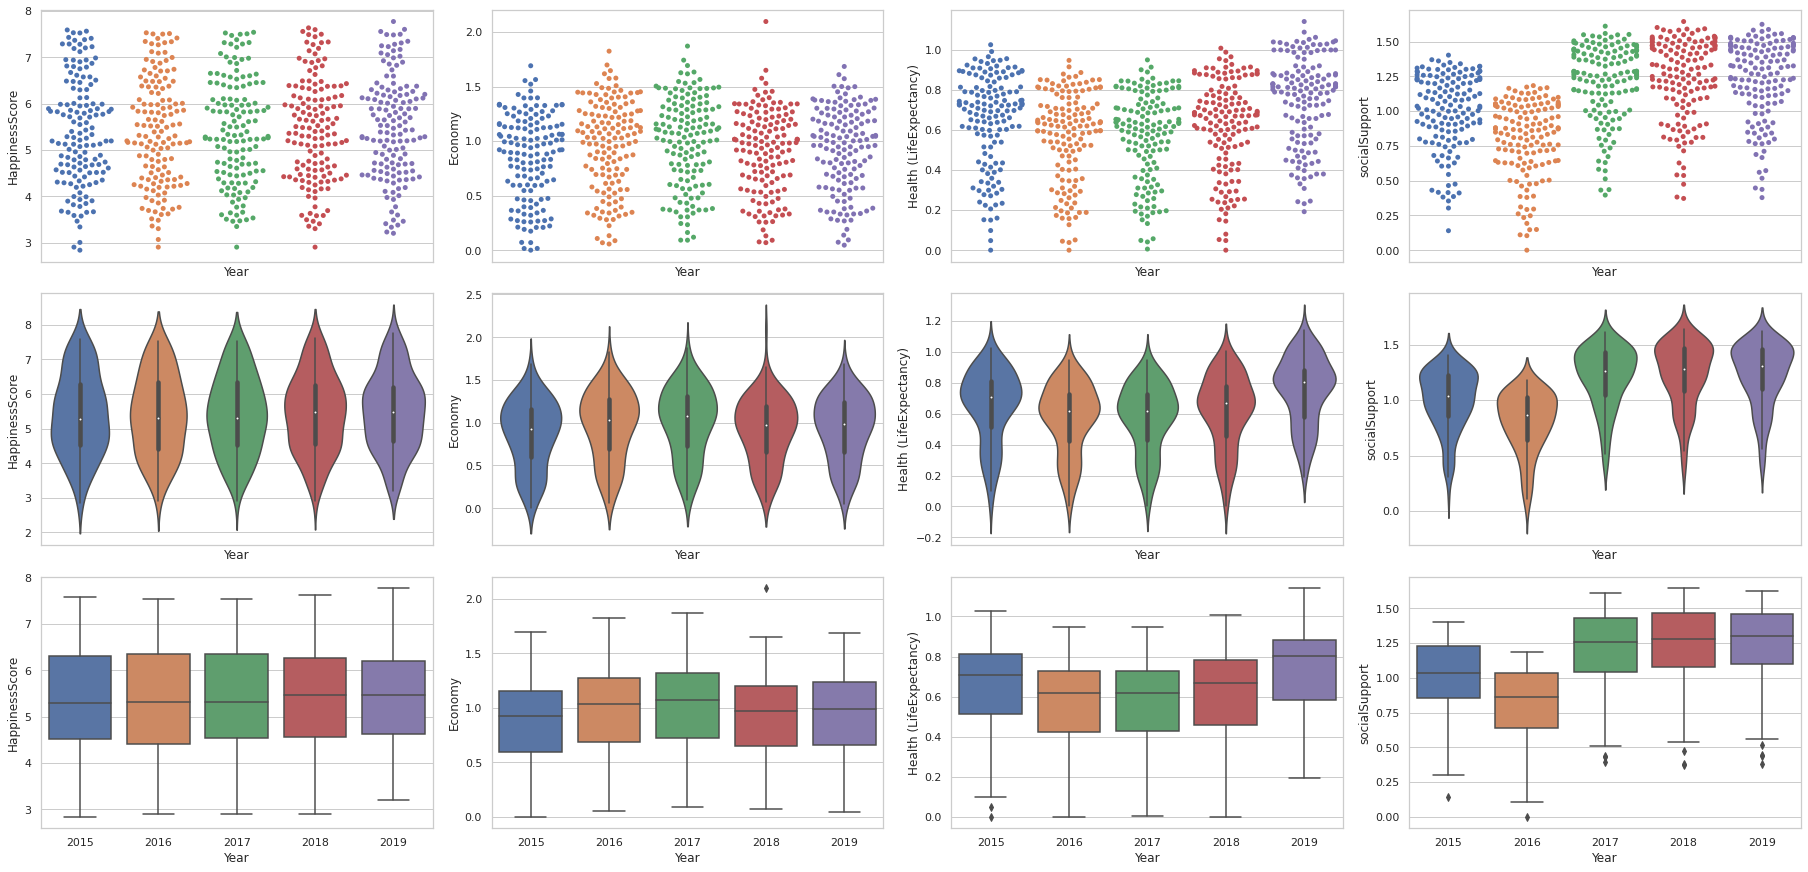

In [41]:
fig, ax = plt.subplots(3, 4, figsize=(25,12), constrained_layout=True, sharex=True)

sns.swarmplot(data=AllFeatures, x='Year', y='HappinessScore', ax=ax[0,0])
sns.swarmplot(data=AllFeatures, x='Year', y='Economy', ax=ax[0,1])
sns.swarmplot(data=AllFeatures, x='Year', y='Health (LifeExpectancy)', ax=ax[0,2])
sns.swarmplot(data=AllFeatures, x='Year', y='socialSupport', ax=ax[0,3])

sns.violinplot(data=AllFeatures, x='Year', y='HappinessScore', ax=ax[1,0])
sns.violinplot(data=AllFeatures, x='Year', y='Economy', ax=ax[1,1])
sns.violinplot(data=AllFeatures, x='Year', y='Health (LifeExpectancy)', ax=ax[1,2])
sns.violinplot(data=AllFeatures, x='Year', y='socialSupport', ax=ax[1,3])

sns.boxplot(data=AllFeatures, x='Year', y='HappinessScore', ax=ax[2,0])
sns.boxplot(data=AllFeatures, x='Year', y='Economy', ax=ax[2,1])
sns.boxplot(data=AllFeatures, x='Year', y='Health (LifeExpectancy)', ax=ax[2,2])
sns.boxplot(data=AllFeatures, x='Year', y='socialSupport', ax=ax[2,3])

plt.show()

### <a name='12'></a>Usunięcie wartości odstających

In [42]:
AllFeatures.head()

,Country or region,Year,HappinessScore,Economy,Health (LifeExpectancy),socialSupport
0,Switzerland,2015,7.587,1.39651,0.941430,1.349510
1,Switzerland,2016,7.509,1.52733,0.863030,1.145240
2,Switzerland,2017,7.494,1.56498,0.858131,1.516912
3,Switzerland,2018,7.487,1.42000,0.927000,1.549000
4,Switzerland,2019,7.480,1.45200,1.052000,1.526000


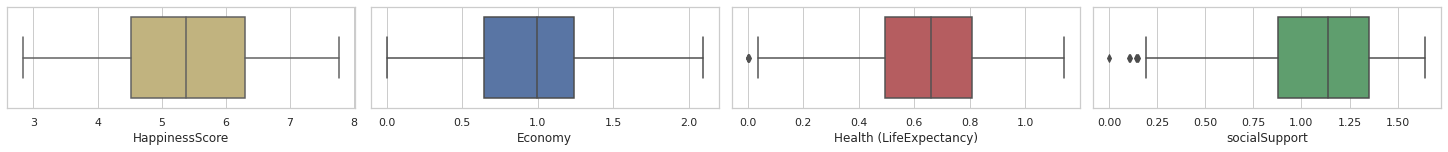

In [43]:
cols = ['HappinessScore', 'Economy', 	'Health (LifeExpectancy)', 'socialSupport']
colors = ['y', 'b', 'r', 'g']


fig, ax = plt.subplots(1, 4, figsize=(20,2), constrained_layout=True)
for i, col in enumerate(cols):
  sns.boxplot(  x=col, data=AllFeatures, ax=ax[i], color=colors[i])

plt.show()

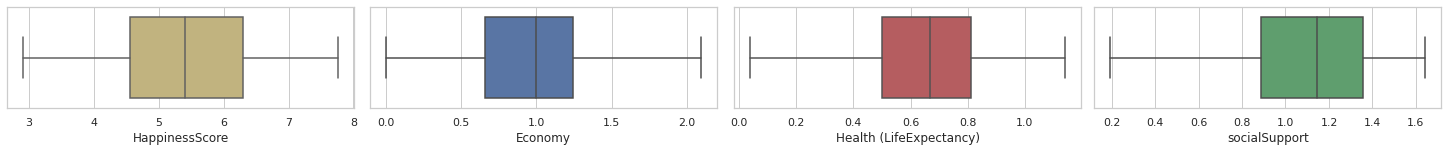

In [44]:
# wyznaczamy dolną część pudełka (lewa część)
Q1 = AllFeatures[cols].quantile(0.25)

# wyznaczamy górną część pudełka (prawa część)
Q3 =  AllFeatures[cols].quantile(0.75)

# IQR - rozstęp kwartylowy
IQR = Q3 - Q1

outlier_condit =  ((AllFeatures[cols] < (Q1 - 1.5*IQR)) | (AllFeatures[cols] > (Q3 + 1.5*IQR)) ) 
AllFeatures_iqr = AllFeatures[cols][~outlier_condit.any(axis=1)]


fig, ax = plt.subplots(1, 4, figsize=(20,2), constrained_layout=True)

for i, col in enumerate(cols):
  sns.boxplot(  x=col, data=AllFeatures_iqr, ax=ax[i], color=colors[i])


plt.show()

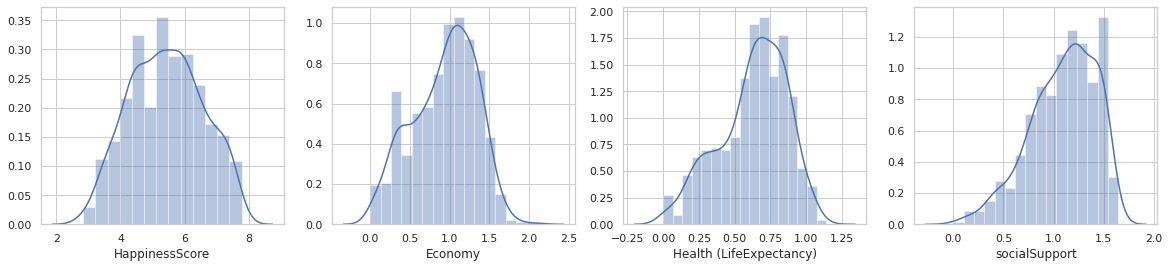

In [45]:
fig, ax = plt.subplots(1,4, figsize=(20,4))

for i, col in enumerate(cols):
  sns.distplot(AllFeatures[col], ax=ax[i])

plt.show()

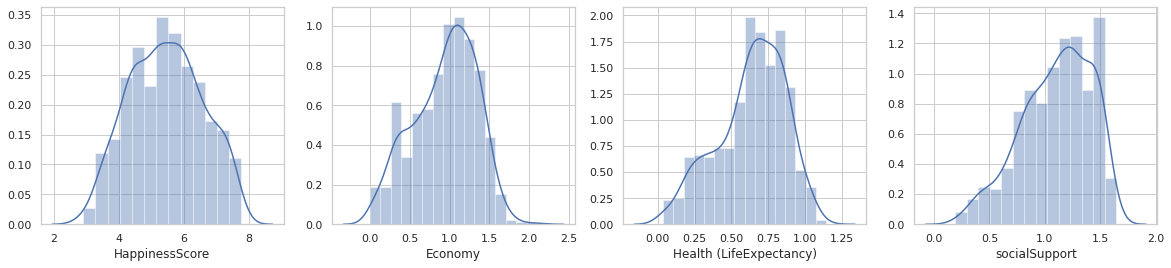

In [46]:
fig, ax = plt.subplots(1,4, figsize=(20,4))

for i, col in enumerate(cols):
  sns.distplot(AllFeatures_iqr[col], ax=ax[i])

plt.show()

In [47]:
AllFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 6 columns):
Country or region          705 non-null object
Year                       705 non-null object
HappinessScore             705 non-null float64
Economy                    705 non-null float64
Health (LifeExpectancy)    705 non-null float64
socialSupport              705 non-null float64
dtypes: float64(4), object(2)
memory usage: 58.6+ KB


In [48]:
for col in ['Country or region', 'Year']:
    AllFeatures[col] = AllFeatures[col].astype('category')

AllFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 6 columns):
Country or region          705 non-null category
Year                       705 non-null category
HappinessScore             705 non-null float64
Economy                    705 non-null float64
Health (LifeExpectancy)    705 non-null float64
socialSupport              705 non-null float64
dtypes: category(2), float64(4)
memory usage: 55.9 KB


In [49]:
AllFeatures.describe().T

,count,mean,std,min,25%,50%,75%,max
HappinessScore,705.0,5.427687,1.129292,2.839,4.51900,5.386000,6.293000,7.769
Economy,705.0,0.932572,0.396697,0.000,0.64200,0.995539,1.241420,2.096
Health (LifeExpectancy),705.0,0.629472,0.234570,0.000,0.49374,0.661890,0.810199,1.141
socialSupport,705.0,1.093172,0.324493,0.000,0.87758,1.137854,1.351000,1.644


In [50]:
# Po pozbyciu się wartości odstających
AllFeatures_iqr.describe().T

,count,mean,std,min,25%,50%,75%,max
HappinessScore,695.0,5.450196,1.118538,2.90500,4.550500,5.40100,6.301000,7.769
Economy,695.0,0.941068,0.392632,0.00000,0.660100,1.00082,1.245230,2.096
Health (LifeExpectancy),695.0,0.635874,0.228921,0.03824,0.500632,0.66900,0.811255,1.141
socialSupport,695.0,1.103101,0.312789,0.19249,0.885940,1.14500,1.357282,1.644


In [51]:
AllFeatures.describe(include=['category']).T

,count,unique,top,freq
Country or region,705,141,Zimbabwe,5
Year,705,5,2019,141


In [52]:
AllFeatures.isnull().sum()

Country or region          0
Year                       0
HappinessScore             0
Economy                    0
Health (LifeExpectancy)    0
socialSupport              0
dtype: int64

In [53]:
AllFeatures_iqr.isnull().sum()

HappinessScore             0
Economy                    0
Health (LifeExpectancy)    0
socialSupport              0
dtype: int64

### <a name='13'></a> Podział danych na zbiory uczące i testowe

In [54]:
features = ['Economy', 'Health (LifeExpectancy)', 'socialSupport']
label = 'HappinessScore'

X = AllFeatures[features].values
y = AllFeatures[label].values.reshape(-1,1)

# Bez wartości odstających:
X_iqr = AllFeatures_iqr[features].values
y_iqr = AllFeatures_iqr[label].values.reshape(-1,1)

print(f'X: {X.shape},   X_iqr: {X_iqr.shape}')
print(f'y: {y.shape},   y_iqr: {y_iqr.shape}')

X: (705, 3),   X_iqr: (695, 3)
y: (705, 1),   y_iqr: (695, 1)


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_iqr_train, X_iqr_test, y_iqr_train, y_iqr_test = train_test_split(X_iqr, y_iqr, test_size=0.2)


print(f'X_train shape:  {X_train.shape},    X_iqr_train shape: {X_iqr_train.shape}')
print(f'X_test shape:   {X_test.shape},     X_iqr_test shape: {X_iqr_test.shape}')

print(f'y_train shape:  {y_train.shape},    y_iqr_train shape: {y_iqr_train.shape}')
print(f'y_test shape:   {y_test.shape},     y_iqr_test shape: {y_iqr_test.shape}')

X_train shape:  (564, 3),    X_iqr_train shape: (556, 3)
X_test shape:   (141, 3),     X_iqr_test shape: (139, 3)
y_train shape:  (564, 1),    y_iqr_train shape: (556, 1)
y_test shape:   (141, 1),     y_iqr_test shape: (139, 1)


### <a name='14'></a> Skalowanie wartości

In [0]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler_iqr = StandardScaler()
scaler_iqr.fit(X_iqr)
X_iqr = scaler.transform(X_iqr)

### <a name='15'></a> Testowanie modelu regresji liniowej

In [57]:
metric_cols =[('SCORES', 'SCORE[%]'), ('SCORES', 'SCORE(IQR)[%]'), ('R2','Train[%]'), ('R2','Test[%]'), ('R2(IQR)','Train[%]'), ('R2(IQR)','Test[%]')]

metrics_df = pd.DataFrame(columns=metric_cols )
metrics_df.columns = pd.MultiIndex.from_tuples(metrics_df.columns)

index = 0

for i in range(150):  
  # podzielimy dane na zbiory uczące i testowe:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  X_iqr_train, X_iqr_test, y_iqr_train, y_iqr_test = train_test_split(X_iqr, y_iqr, test_size=0.2)

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  lin_reg_iqr = LinearRegression()
  lin_reg_iqr.fit(X_iqr_train, y_iqr_train)

  y_pred_test = lr.predict(X_test)
  y_pred_iqr_sc_test = lin_reg_iqr.predict(X_iqr_test)

  y_pred_train = lr.predict(X_train)
  y_pred_iqr_sc_train = lin_reg_iqr.predict(X_iqr_train)
  
  score = lr.score(X_test, y_test)
  score_iqr = lr.score(X_iqr_test, y_iqr_test)

  r2_train =  r2_score(y_train, y_pred_train)
  r2_train_iqr = r2_score(y_iqr_train, y_pred_iqr_sc_train)

  r2_test =  r2_score(y_test, y_pred_test)
  r2_test_iqr = r2_score(y_iqr_test, y_pred_iqr_sc_test)

  SCORE, SCORE_IQR = (round(score*100,2), round(score_iqr*100,2) )
  R2_train, R2_test = (round(r2_train*100,2), round(r2_test*100,2))
  R2_IQR_train, R2_IQR_test = round(r2_train_iqr*100,2), round(r2_test_iqr*100,2)

  # #############################################################################

  metrics_df.loc[index] = [SCORE, SCORE_IQR, R2_train, R2_test, R2_IQR_train, R2_IQR_test]

  index +=1

metrics_df.tail()

SCORES                     R2          R2(IQR)        
    SCORE[%] SCORE(IQR)[%] Train[%] Test[%] Train[%] Test[%]
145    66.46         69.80    72.57   66.46    71.68   69.55
146    72.53         71.71    71.10   72.53    71.20   71.45
147    72.15         68.52    70.93   72.15    71.89   68.10
148    71.48         70.18    71.48   71.48    71.55   70.04
149    74.48         71.14    70.82   74.48    71.32   71.12